# Intro to Dask

`Dask` is a parallel computing library that enables you to scale your python workflows and execute computations on at scale on different architectures.

`Dask` can scale down to your laptop and up to a cluster, supercomputing center, remote workstation or cloud provider, giving you enormous flexibility in the compute backend you provide your workflow.

We are going to cover an intro to `Dask` in this workbook and begin to scale up from there!

We will start with `Dask` arrays as many people will already be familiar with `NumPy`' arrays and these will form an easy intro to `Dask` functionality

In [28]:
import dask.array as da

One of the critical concepts of `Dask` is that your tasks can be excecuted by any arbitrary **backend engine** called a `Client`. 

Here we are going to start a client using the defualt configuration, which makes an asessment of available resources and automatically sorts out a `Client`.

For example on my laptop my client has 4 processes, 4 threads and 8Gb of memory. 


In [29]:
# If you run this notebook on your local computer or NCI's VDI instance, you can create cluster
from dask.distributed import Client
client = Client()
print(client)
print(client.dashboard_link)

/Users/hugo/opt/anaconda3/envs/nci/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 60173 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:60174' processes=4 threads=4, memory=8.00 GiB>
http://127.0.0.1:60173/status


Importantly I have shown something called the client `dashboard link`.  I highly reccomend 

# Dask Arrays

A dask array looks and feels a lot like a numpy array. However, a dask array doesn't directly hold any data. Instead, it symbolically represents the computations needed to generate the data. Nothing is actually computed until the numerical values are needed. This mode of operation is called "lazy"; it allows one to build up complex, large calculations symbolically before turning them over to the scheduler for execution.

In [19]:
shape = (1000, 4000)
chunk_shape = (1000, 1000)
ones = da.ones(shape, chunks=chunk_shape)
ones


dask.array<ones_like, shape=(1000, 4000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [20]:
ones.compute()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

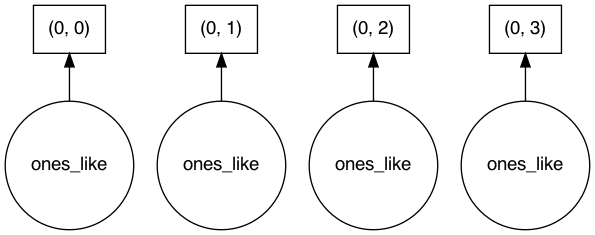

In [21]:
ones.visualize()

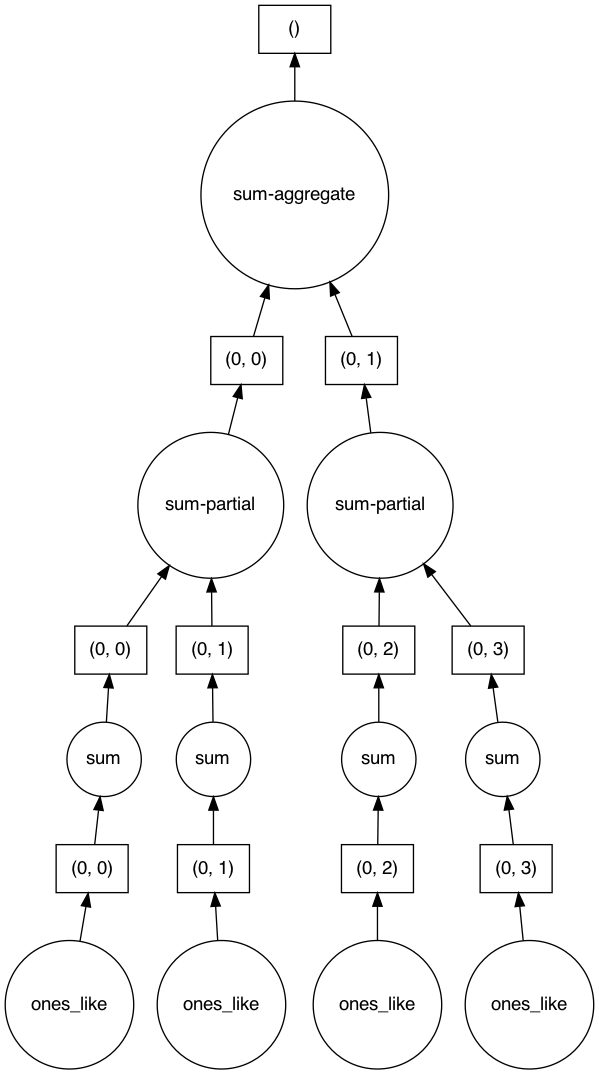

In [22]:
sum_of_ones = ones.sum()
sum_of_ones.visualize()

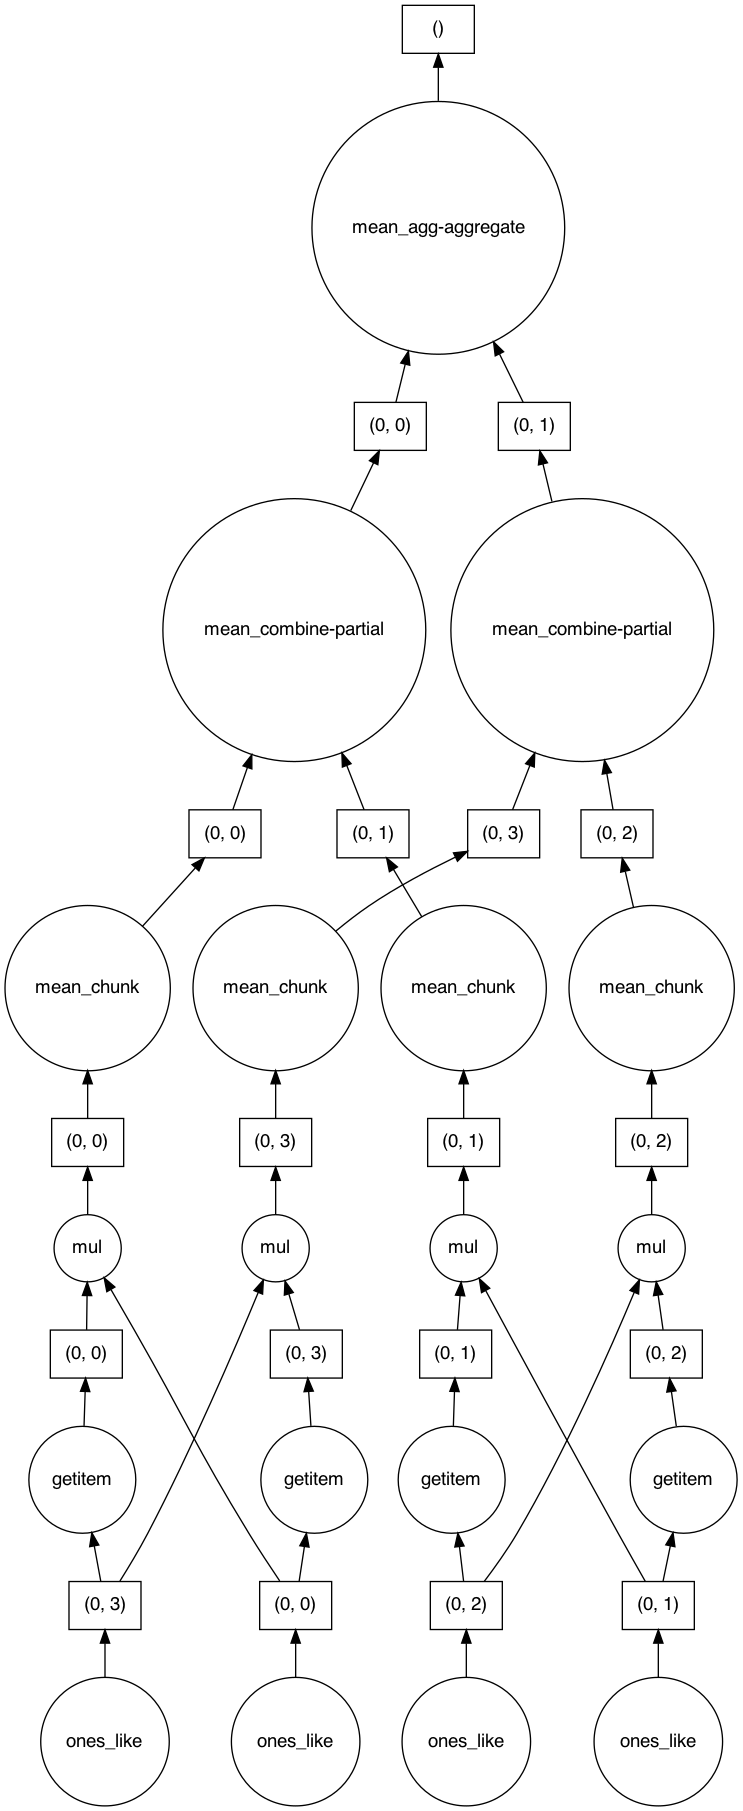

In [23]:
fancy_calculation = (ones * ones[::-1, ::-1]).mean()
fancy_calculation.visualize()


In [24]:
bigshape = (200000, 4000)
big_ones = da.ones(bigshape, chunks=chunk_shape)
big_ones

from dask.diagnostics import ProgressBar

big_calc = (big_ones * big_ones[::-1, ::-1]).mean()

with ProgressBar():
    result = big_calc.compute()

In [25]:
import numpy as np
big_ones_reduce = (np.cos(big_ones)**2).mean(axis=0)
big_ones_reduce

dask.array<mean_agg-aggregate, shape=(4000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>

In [26]:
big_ones_reduce.compute()

array([0.29192658, 0.29192658, 0.29192658, ..., 0.29192658, 0.29192658,
       0.29192658])

In [27]:
client.close()